<a href="https://colab.research.google.com/github/yichen8/Final-case-study-covid-vaccinations/blob/main/Final_case_study_yichen8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Case Study: COVID-19 World Vaccinations Progress 💉 

---
done by *Nicole Zhang*,
2021/5/12

(Dataset obtained from https://www.kaggle.com/gpreda/covid-world-vaccination-progress?select=country_vaccinations.csv)

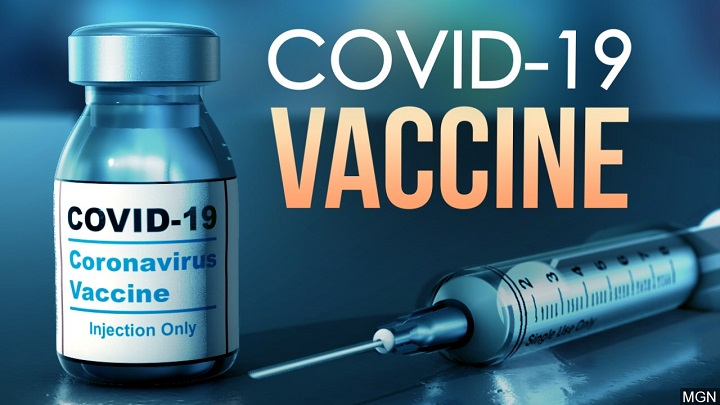

# Why I Picked the Dataset 😄

* Coming from China, I have noticed that people in China and US have a different attitude towards getting COVID vaccinations
* I have been paying attention to the COVID vaccinations progress in the past few months, and lots of factors have played a role in affecting the number of people getting vaccinated, including vaccine supply, number of people getting & recovering from COVID, eligibility determined by Health Department, effectiveness rate...
* I think I would use this opportunity to get to know the world better by seeing what's going on in other countries that I have not paid much attention to : )





# Interesting Questions to Explore 🔍



1.   What countries have the most people / most people per hundred getting vaccinated? 🥉 
2. Why do these countries have the highest number? 🔝

3.   How does China's vaccination progress compared to that of US? 🇨🇳 🇺🇸
4. What is the overall trend of covid vaccinations across the globe? 🌍
5. Does a high total vaccination amount equal to a high per hundred result? (Some countries have more population...) 👨 👩





# Preparation Work 📒



## ▶ Check & Update Plotly Version










In [1]:
# Install plotly 4.14.3 using pip
# Colab environment supports pip
if 'google.colab' in str(get_ipython()):
    !pip install plotly==4.14.3

# If you're using conda, use the code below
# !conda install -c plotly plotly=4.14.3

## ▶ Import Python Packgages

In [2]:
# Import Python Packages
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# plotly.io is a low-level interface for interacting with figures/
# plotly.io.templates lists available plotly templates
# https://plotly.com/python-api-reference/plotly.io.html
import plotly.io as pio

pd.set_option('display.max_columns', 50)

## ▶ Read & Process dataset

In [3]:
# Read the dataset
df = pd.read_csv('https://github.com/yichen8/Final-case-study-covid-vaccinations/blob/main/country_vaccinations.csv?raw=true')

# Inspecting the Dataset ☑️

## ▶ Dataset Basic Inspection with `shape`, `info()`, `describe()`

In [4]:
# Display the number of rows and columns
num_rows = df.shape[0]
num_cols = df.shape[1]

print(f'There are {num_rows} rows and {num_cols} columns in the dataset.')

There are 15505 rows and 15 columns in the dataset.


In [5]:
# Check the data types of each column and number of non-missing rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15505 entries, 0 to 15504
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              15505 non-null  object 
 1   iso_code                             15505 non-null  object 
 2   date                                 15505 non-null  object 
 3   total_vaccinations                   9325 non-null   float64
 4   people_vaccinated                    8649 non-null   float64
 5   people_fully_vaccinated              6425 non-null   float64
 6   daily_vaccinations_raw               7830 non-null   float64
 7   daily_vaccinations                   15307 non-null  float64
 8   total_vaccinations_per_hundred       9325 non-null   float64
 9   people_vaccinated_per_hundred        8649 non-null   float64
 10  people_fully_vaccinated_per_hundred  6425 non-null   float64
 11  daily_vaccinations_per_milli

In [6]:
# View basic statistical details
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,9.325000e+03,8.649000e+03,6.425000e+03,7.830000e+03,1.530700e+04,9325.000000,8649.000000,6425.000000,15307.000000
mean,5.180765e+06,3.271412e+06,1.645949e+06,1.359830e+05,7.910911e+04,15.928546,11.555663,5.836851,2997.132292
std,2.131066e+07,1.221271e+07,7.123496e+06,5.231930e+05,3.616686e+05,23.530195,15.459619,10.116900,4693.081687
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,6.208300e+04,5.349000e+04,2.410700e+04,3.020500e+03,9.175000e+02,1.390000,1.300000,0.650000,358.000000
50%,4.419760e+05,3.380570e+05,1.792920e+05,1.603550e+04,6.506000e+03,6.590000,5.080000,2.460000,1501.000000
75%,1.988844e+06,1.380430e+06,7.142100e+05,6.341400e+04,2.987550e+04,20.610000,15.340000,6.630000,4008.500000
max,2.896270e+08,1.485629e+08,1.073465e+08,1.160100e+07,7.205286e+06,211.080000,111.320000,99.760000,118759.000000


## ▶ Overview of Dataset with `head()`, `tail()`

In [7]:
# Display the top 5 rows of the dataset
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [8]:
# Display the bottom 5 rows of the dataset
df.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
15500,Zimbabwe,ZWE,2021-04-30,500342.0,414735.0,85607.0,22745.0,19194.0,3.37,2.79,0.58,1291.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
15501,Zimbabwe,ZWE,2021-05-01,520299.0,428135.0,92164.0,19957.0,21171.0,3.50,2.88,0.62,1424.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
15502,Zimbabwe,ZWE,2021-05-02,524199.0,430068.0,94131.0,3900.0,19169.0,3.53,2.89,0.63,1290.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
15503,Zimbabwe,ZWE,2021-05-03,537516.0,437751.0,99765.0,13317.0,17987.0,3.62,2.95,0.67,1210.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
15504,Zimbabwe,ZWE,2021-05-04,559777.0,452191.0,107586.0,22261.0,17977.0,3.77,3.04,0.72,1210.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...


# Perform EDA 🔢

## ▶ Aggregate Data by `country` 

In [9]:
# Aggregate total vaccinations by country
df_by_country = df.groupby('country', as_index=False).agg({'daily_vaccinations': 'sum', 
                                                           'daily_vaccinations_per_million': 'sum',
                                                           'people_vaccinated': 'max',
                                                           'people_fully_vaccinated': 'max',
                                                           'people_vaccinated_per_hundred': 'max',
                                                           'people_fully_vaccinated_per_hundred': 'max'})

display(df_by_country)
print(df_by_country.columns)

,country,daily_vaccinations,daily_vaccinations_per_million,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
0,Afghanistan,220096.0,5663.0,240000.0,NaN,0.62,NaN
1,Albania,506109.0,175859.0,6073.0,655.0,0.21,0.02
2,Algeria,69070.0,1568.0,NaN,NaN,NaN,NaN
3,Andorra,28344.0,366843.0,24182.0,4699.0,31.30,6.08
4,Angola,411806.0,12533.0,456349.0,NaN,1.39,NaN
...,...,...,...,...,...,...,...
190,Venezuela,204518.0,7190.0,250000.0,NaN,0.88,NaN
191,Vietnam,530198.0,5450.0,585539.0,NaN,0.60,NaN
192,Wales,2577064.0,817372.0,1873152.0,783120.0,59.41,24.84
193,Zambia,43054.0,2343.0,58982.0,NaN,0.32,NaN


Index(['country', 'daily_vaccinations', 'daily_vaccinations_per_million',
       'people_vaccinated', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'],
      dtype='object')


### ▶ Sort & Filter Dataset 

In [10]:
# Sort countries with most total daily vaccinations
df_country_daily_vac_desc = df_by_country.sort_values('daily_vaccinations', ascending=False)
df_country_daily_vac_desc

,country,daily_vaccinations,daily_vaccinations_per_million,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
34,China,273119359.0,189746.0,NaN,NaN,NaN,NaN
187,United States,244231380.0,730265.0,148562891.0,107346533.0,44.42,32.10
78,India,155169245.0,112437.0,129730641.0,30200597.0,9.40,2.19
186,United Kingdom,48732044.0,717853.0,34795074.0,15887493.0,51.26,23.40
25,Brazil,43705963.0,205620.0,30921100.0,14750572.0,14.55,6.94
...,...,...,...,...,...,...,...
163,Somalia,0.0,0.0,117567.0,NaN,0.74,NaN
99,Libya,0.0,0.0,750.0,NaN,0.01,NaN
45,Djibouti,0.0,0.0,10246.0,NaN,1.04,NaN
36,Congo,0.0,0.0,14297.0,NaN,0.26,NaN


In [11]:
# Filter countries with over 20 Million Total Daily Vaccinations
df_over_20M = df_by_country[df_by_country['daily_vaccinations'] >= 20000000]

# Sort the filtered countries with the most Total Daily Vaccinations
df_over_20M_desc = df_over_20M.sort_values('daily_vaccinations', ascending=False)
df_over_20M_desc

,country,daily_vaccinations,daily_vaccinations_per_million,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
34,China,273119359.0,189746.0,NaN,NaN,NaN,NaN
187,United States,244231380.0,730265.0,148562891.0,107346533.0,44.42,32.10
78,India,155169245.0,112437.0,129730641.0,30200597.0,9.40,2.19
186,United Kingdom,48732044.0,717853.0,34795074.0,15887493.0,51.26,23.40
25,Brazil,43705963.0,205620.0,30921100.0,14750572.0,14.55,6.94
51,England,40802307.0,724892.0,29124310.0,13284182.0,51.74,23.60
64,Germany,30578133.0,364960.0,25462944.0,7145486.0,30.39,8.53
181,Turkey,23937205.0,283824.0,14264014.0,9839869.0,16.91,11.67
60,France,22264213.0,326704.0,16470369.0,7007993.0,24.17,10.28
85,Italy,20829337.0,344499.0,15544174.0,6688864.0,25.71,11.06


👉 **Implication of result**: China, US, India, UK, and Brazil are top 5 countries with the most daily vaccinations (sum of all daily vaccinations). For the countries with over 20 Million total daily vaccinations, they  have larger population and have access to vaccinationos, either has its own vaccine manufacturer, or purchase from other countries. 

In [12]:
# Filter countries with over 5 Million People Fully Vaccinated
df_over_5M = df_by_country[df_by_country['people_fully_vaccinated'] >= 5000000]
df_over_5M.sort_values('people_fully_vaccinated', ascending=False)

,country,daily_vaccinations,daily_vaccinations_per_million,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
187,United States,244231380.0,730265.0,148562891.0,107346533.0,44.42,32.10
78,India,155169245.0,112437.0,129730641.0,30200597.0,9.40,2.19
186,United Kingdom,48732044.0,717853.0,34795074.0,15887493.0,51.26,23.40
25,Brazil,43705963.0,205620.0,30921100.0,14750572.0,14.55,6.94
51,England,40802307.0,724892.0,29124310.0,13284182.0,51.74,23.60
181,Turkey,23937205.0,283824.0,14264014.0,9839869.0,16.91,11.67
111,Mexico,18305283.0,141976.0,12984236.0,8418291.0,10.07,6.53
144,Russia,20033358.0,137292.0,12704207.0,8015940.0,8.71,5.49
79,Indonesia,20175633.0,73757.0,12699568.0,8002236.0,4.64,2.93
64,Germany,30578133.0,364960.0,25462944.0,7145486.0,30.39,8.53


👉 **Implication of result**: When comparing the total people vaccinated and the sum of daily vaccinations, one big difference is that China is not on the list for number of people vaccinated (it has the highest daily vaccinations). The reason is that the dataset is missing certain values for columns. For example, it does not have values entered in people (fully) vaccinated. This is one limitation of this dataset but also shows that the Ministry of Health for these countries might not have disclosed the data publicly.

## ▶ Group `date` into `month` 

In [13]:
# Extract year, month, day from a datetime column
df['date_parsed'] = pd.to_datetime(df['date'])

df['extract_year'] = df['date_parsed'].dt.year
df['extract_month'] = df['date_parsed'].dt.month
df['extract_day'] = df['date_parsed'].dt.day

df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,date_parsed,extract_year,extract_month,extract_day
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,2021-02-22,2021,2,22
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,2021-02-23,2021,2,23
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,2021-02-24,2021,2,24
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,2021-02-25,2021,2,25
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,2021-02-26,2021,2,26


In [14]:
# Group days into months
df_by_month = df.groupby(['country', 'extract_month'], as_index=False).agg({'daily_vaccinations': 'sum',
                                                              'daily_vaccinations_per_million': 'sum',
                                                              'people_vaccinated': 'max',
                                                              'people_fully_vaccinated': 'max',
                                                              'people_vaccinated_per_hundred': 'max',
                                                              'people_fully_vaccinated_per_hundred': 'max',
                                                              'total_vaccinations': 'max',
                                                              'total_vaccinations_per_hundred': 'max',
                                                              'people_fully_vaccinated_per_hundred': 'max'})
df_by_month

,country,extract_month,daily_vaccinations,daily_vaccinations_per_million,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_vaccinations,total_vaccinations_per_hundred
0,Afghanistan,2,8202.0,210.0,8200.0,NaN,0.02,NaN,8200.0,0.02
1,Afghanistan,3,85894.0,2213.0,54000.0,NaN,0.14,NaN,54000.0,0.14
2,Afghanistan,4,126000.0,3240.0,240000.0,NaN,0.62,NaN,240000.0,0.62
3,Albania,1,741.0,257.0,549.0,NaN,0.02,NaN,549.0,0.02
4,Albania,2,9504.0,3300.0,6073.0,655.0,0.21,0.02,10135.0,0.35
...,...,...,...,...,...,...,...,...,...,...
747,Zambia,5,21694.0,1180.0,58982.0,NaN,0.32,NaN,58982.0,0.32
748,Zimbabwe,2,11455.0,771.0,18843.0,NaN,0.13,NaN,18843.0,0.13
749,Zimbabwe,3,66743.0,4492.0,76995.0,14885.0,0.52,0.10,91880.0,0.62
750,Zimbabwe,4,357864.0,24076.0,414735.0,85607.0,2.79,0.58,500342.0,3.37


👉 **Implication of result**: Most countries have started vaccinations during February (extract_month = 2) and went along through present (extract_month = 5). The overall trend is increasing, meaning more people are getting vaccines / more vaccinations given.

### ▶ Sort & Filter Dataset 

In [15]:
# Filter the data for United States only
df_us = df[df['country'] == 'United States']
df_us.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,date_parsed,extract_year,extract_month,extract_day
14938,United States,USA,2020-12-20,556208.0,556208.0,NaN,NaN,NaN,0.17,0.17,NaN,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,2020-12-20,2020,12,20
14939,United States,USA,2020-12-21,614117.0,614117.0,NaN,57909.0,57909.0,0.18,0.18,NaN,173.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,2020-12-21,2020,12,21
14940,United States,USA,2020-12-22,NaN,NaN,NaN,NaN,127432.0,NaN,NaN,NaN,381.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,2020-12-22,2020,12,22
14941,United States,USA,2020-12-23,1008025.0,1008025.0,NaN,NaN,150606.0,0.30,0.30,NaN,450.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,2020-12-23,2020,12,23
14942,United States,USA,2020-12-24,NaN,NaN,NaN,NaN,191001.0,NaN,NaN,NaN,571.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,2020-12-24,2020,12,24


In [16]:
df_us_by_month = df_by_month[df_by_month['country'] == 'United States']
df_us_by_month.sort_values('daily_vaccinations', ascending=False)

,country,extract_month,daily_vaccinations,daily_vaccinations_per_million,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_vaccinations,total_vaccinations_per_hundred
726,United States,4,90330815.0,270094.0,144894586.0,101407318.0,43.32,30.32,240159677.0,71.81
725,United States,3,73553858.0,219929.0,97593290.0,54607041.0,29.18,16.33,150273292.0,44.93
724,United States,2,42391064.0,126752.0,49772180.0,24779920.0,14.88,7.41,75236003.0,22.50
723,United States,1,24205764.0,72377.0,25201143.0,5657142.0,7.54,1.69,31123299.0,9.31
727,United States,5,11579087.0,34622.0,148562891.0,107346533.0,44.42,32.10,249566820.0,74.62
728,United States,12,2170792.0,6491.0,2794588.0,NaN,0.84,NaN,2794588.0,0.84


👉 **Implication of result**: I group & extract the monthly result for United States. After sorting the values by the most daily vaccinations, it makes sense that it follows the order of April, March, February, January, May, and Decemeber. Overall, it solidifes the conclusion that it shows an upward trend. Since May only has data up to 5/5 and December is the starting month, they have fewer values as reported in the dataset.

# Python Visualizations 📚

### ▶ Distribution Visualizations: `Histogram` & `Heatmap`

#### ▶ Histogram

In [17]:
# People vaccinated per hundred Histogram
fig = px.histogram(df_by_country, x='people_vaccinated_per_hundred', title='People Vaccinated per Hundred Histogram', nbins=30)
fig.show()

In [18]:
# Drop outliers over 100 and values equal to zero
df_by_country.drop(df_by_country.loc[df_by_country['people_vaccinated_per_hundred'] >= 100].index, inplace=True)
df_by_country.drop(df_by_country.loc[df_by_country['people_vaccinated_per_hundred'] == 0].index, inplace=True)

👉 **Implication of result**: I noticed that after plotting the people vaccinated per hundred histogram, there is an outlier where the value is over 100. It is not realistic to have over 100 people vaccinated per hundred people, so I think it is caused by data errors and decide to drop this outlier. I also dropped countries that do not report their data in this column (value = 0)

In [19]:
# Modified People vaccinated per hundred Histogram
fig = px.histogram(df_by_country, x='people_vaccinated_per_hundred', title='People Vaccinated per Hundred Histogram', nbins=30)
fig.show()

👉 **Implication of result**: After dropping the error result, the histogram is shown above. Majority of the countries have a 0-20% vaccinated rate, with only about 12 countries (out of 185) over 50% vaccination rate. 

#### ▶ Heatmap

In [20]:
# Country vs People Vaccinated Per Hundred Heatmap
fig = px.density_heatmap(
    df,
    x='country',
    y='people_vaccinated_per_hundred',
    title='Country vs People Vaccinated Per Hundred Heatmap',
    height=600
)
fig.show()

👉 **Implication of result**: This may not be the best graph to plot in heatmap. Basically, it counts the frequency (over a 5.0 range) of people vaccinated per hundred. A warmer color indicates the country has stayed in this range for a longer period.

## ▶ Other Visualizations: `Line Graph`, `Scatter Plot` & `Bar Chart`

### ▶ Line Graph

In [21]:
# Select China and US for comparison
df_us_and_china = df[(df['country'] == 'United States') | (df['country'] == 'China')]
df_us_and_china.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,date_parsed,extract_year,extract_month,extract_day
2762,China,CHN,2020-12-15,1500000.0,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,http://www.nhc.gov.cn/xcs/yqjzqk/202105/c953cb...,2020-12-15,2020,12,15
2763,China,CHN,2020-12-16,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,http://www.nhc.gov.cn/xcs/yqjzqk/202105/c953cb...,2020-12-16,2020,12,16
2764,China,CHN,2020-12-17,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,http://www.nhc.gov.cn/xcs/yqjzqk/202105/c953cb...,2020-12-17,2020,12,17
2765,China,CHN,2020-12-18,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,http://www.nhc.gov.cn/xcs/yqjzqk/202105/c953cb...,2020-12-18,2020,12,18
2766,China,CHN,2020-12-19,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,http://www.nhc.gov.cn/xcs/yqjzqk/202105/c953cb...,2020-12-19,2020,12,19


In [22]:
# Line graph of Daily Vaccinations Comparison between US and China
fig = px.line(df_us_and_china, x='date', y='daily_vaccinations', 
                 color='country', title='Daily Vaccinations Comparison between US and China')
fig.show()

👉 **Implication of result**: I chose US and China to do the comparison since one is my home country and the other is the place where I am at. Again, there is an overall upward trend. I think China has more daily vaccinations since it has a larger population. There is a drop in the midst of China's result and that can be due to short of supply from what I heard of as people are waiting to get the second shot of vaccines.

### ▶ Scatter Plot

In [23]:
# Select Ireland and Israel for comparison
df_ireland_and_israel = df[(df['country'] == 'Ireland') | (df['country'] == 'Israel')]
df_ireland_and_israel.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,date_parsed,extract_year,extract_month,extract_day
6678,Ireland,IRL,2020-12-31,1800.0,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Heath Service Executive,https://covid19ireland-geohive.hub.arcgis.com/,2020-12-31,2020,12,31
6679,Ireland,IRL,2021-01-01,NaN,NaN,NaN,NaN,550.0,NaN,NaN,NaN,111.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Heath Service Executive,https://covid19ireland-geohive.hub.arcgis.com/,2021-01-01,2021,1,1
6680,Ireland,IRL,2021-01-02,NaN,NaN,NaN,NaN,550.0,NaN,NaN,NaN,111.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Heath Service Executive,https://covid19ireland-geohive.hub.arcgis.com/,2021-01-02,2021,1,2
6681,Ireland,IRL,2021-01-03,NaN,NaN,NaN,NaN,550.0,NaN,NaN,NaN,111.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Heath Service Executive,https://covid19ireland-geohive.hub.arcgis.com/,2021-01-03,2021,1,3
6682,Ireland,IRL,2021-01-04,4000.0,NaN,NaN,NaN,550.0,0.08,NaN,NaN,111.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Heath Service Executive,https://covid19ireland-geohive.hub.arcgis.com/,2021-01-04,2021,1,4


In [24]:
# Scatter Plot of Daily Vaccinations Comparison between Ireland and Israel
fig = px.scatter(df_ireland_and_israel, x='date', y='people_vaccinated_per_hundred', 
                 color='country',template='plotly_dark', title='Daily Vaccinations Comparison between Ireland and Israel')
fig.show()

👉 **Implication of result**: I chose Ireland and Israel for the second comparison as these are my two study abroad programs that were cancelled due to COVID last year. I was about to go to Israel last Spring Break (March 2020) and Ireland (June-July 2020), so I think it would be interesting to see how they are dealing with COVID now. I have known from news sources before diving into the dataset that Israel has the highest rate of people getting vaccinated. When comparing to that of Ireland, it does show that Ireland has a much lower rate.

### ▶ Bar Chart

In [25]:
# Bar Chart of Countries with over 20 Million Total Daily Vaccinations
fig = px.bar(df_over_20M, x='country', y='daily_vaccinations', title='Bar Chart of Countries with over 20 Million Total Daily Vaccinations')
fig.show()

👉 **Implication of result**: This is the visualization for one of the filters I have applied in the previous part. It is easy to see that China, US, India, and UK has a much higher / leading result in the total daily vaccinations. 

# Key Takeaways 💡



*   The exploratory data analysis process basically answers all of my pre-set questions and I am able to get an overview of the total 195 countries while diving deeper into the specific countries of my choice.
     *   Countries with larger population generally have higher number of daily vaccinations.
     *   More and more people are getting vaccinations / have access to vaccines according to the monthly trend.
*   One limitation of the dataset is that some columns for a country is missing. Since I decided not to drop the entire row (the country still has some columns that have valid values), it becomes a bit difficult to draw conclusion based on the missing value dataset as I aggregate the data as a whole. 
*   The vaccine column groups several manufacturers in a line, so I did not perform analysis on it. In the Tableau part, I added another csv file specifically for the vaccine manufacturer and am able to do some visualizations on it.





---

# The End.


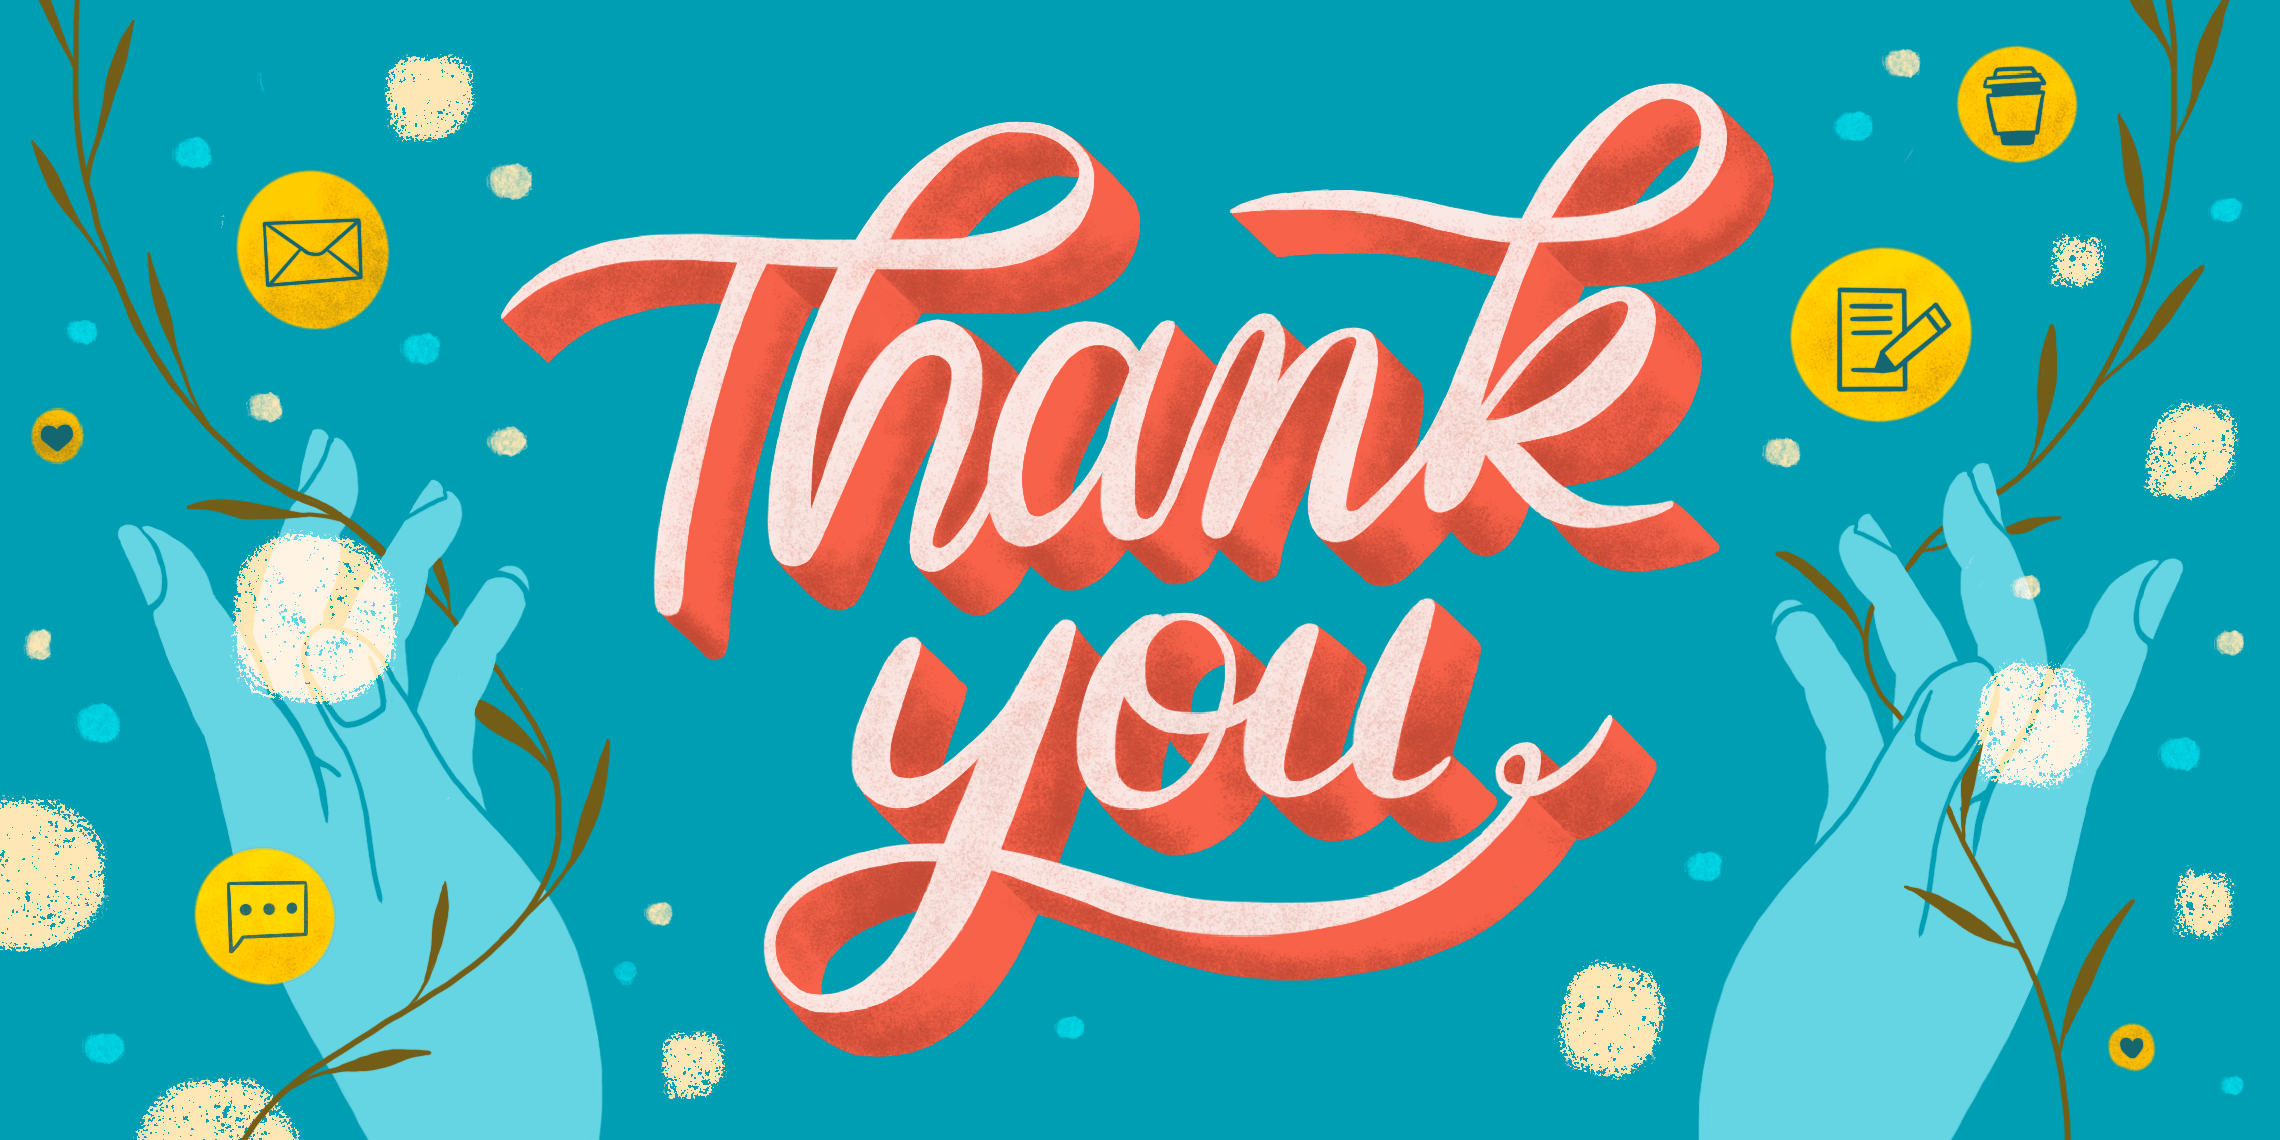